## California Safe Cosmetics Program

The purpose of using the 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('cscpopendata.csv')

In [3]:
df.count()

CDPHId                    107397
ProductName               107397
CSFId                      75148
CSF                        74724
CompanyId                 107397
CompanyName               107397
BrandName                 107186
PrimaryCategoryId         107397
PrimaryCategory           107397
SubCategoryId             107397
SubCategory               107397
CasId                     107397
CasNumber                 101268
ChemicalId                107397
ChemicalName              107397
InitialDateReported       107397
MostRecentDateReported    107397
DiscontinuedDate           12545
ChemicalCreatedAt         107397
ChemicalUpdatedAt         107397
ChemicalDateRemoved         2905
ChemicalCount             107397
dtype: int64

In [4]:
df['ChemicalCount'].count()

107397

In [5]:
#format strings in columns
df['CompanyName'] = df['CompanyName'].str.upper().str.strip()
df['BrandName'] = df['BrandName'].str.upper().str.strip()
df['ChemicalName'] = df['ChemicalName'].str.upper().str.strip()
df['PrimaryCategory'] = df['PrimaryCategory'].str.upper().str.strip()
df['ProductName'] = df['ProductName'].str.upper().str.strip()

In [6]:
df['ChemicalName'].unique()

array(['TITANIUM DIOXIDE', 'DISTILLATES (COAL TAR)', 'ESTRAGOLE',
       'COCAMIDE DIETHANOLAMINE', 'TOLUENE',
       'CHROMIUM (HEXAVALENT COMPOUNDS)', 'RETINOL',
       'RETINOL/RETINYL ESTERS, WHEN IN DAILY DOSAGES IN EXCESS OF 10,000 IU, OR 3,000 RETINOL EQUIVALENTS.',
       'VITAMIN A', 'VITAMIN A PALMITATE', 'BUTYLATED HYDROXYANISOLE',
       'COFFEA ARABICA EXTRACT', 'LAURAMIDE DIETHANOLAMINE', 'COFFEE',
       'SILICA, CRYSTALLINE (AIRBORNE PARTICLES OF RESPIRABLE SIZE)',
       'CARBON BLACK (AIRBORNE, UNBOUND PARTICLES OF RESPIRABLE SIZE)',
       'CARBON BLACK', 'GENISTEIN (PURIFIED)', 'PROGESTERONE',
       '2,4-HEXADIENAL (89% TRANS, TRANS ISOMER; 11% CIS, TRANS ISOMER)',
       'METHYLEUGENOL', 'CARBON-BLACK EXTRACTS', 'RETINYL PALMITATE',
       'O-PHENYLPHENOL', 'ACRYLAMIDE', 'FORMALDEHYDE (GAS)',
       'GINKGO BILOBA EXTRACT', 'MICA', 'ETHYLENE GLYCOL',
       'ACETIC ACID, RETINYL ESTER', 'ETHYL ACRYLATE', 'TRADE SECRET',
       'METHANOL', 'MINERAL OILS, UNTREATED 

In [7]:
#remove paranthesis in ChemicalName
df['ChemicalNameNoParenth'] = df['ChemicalName'].str.replace(r"\(.*\)","")
df['ChemicalNameNoParenth'] = df['ChemicalNameNoParenth'].str.strip()
df['ChemicalNameNoParenth'].unique()

array(['TITANIUM DIOXIDE', 'DISTILLATES', 'ESTRAGOLE',
       'COCAMIDE DIETHANOLAMINE', 'TOLUENE', 'CHROMIUM', 'RETINOL',
       'RETINOL/RETINYL ESTERS, WHEN IN DAILY DOSAGES IN EXCESS OF 10,000 IU, OR 3,000 RETINOL EQUIVALENTS.',
       'VITAMIN A', 'VITAMIN A PALMITATE', 'BUTYLATED HYDROXYANISOLE',
       'COFFEA ARABICA EXTRACT', 'LAURAMIDE DIETHANOLAMINE', 'COFFEE',
       'SILICA, CRYSTALLINE', 'CARBON BLACK', 'GENISTEIN', 'PROGESTERONE',
       '2,4-HEXADIENAL', 'METHYLEUGENOL', 'CARBON-BLACK EXTRACTS',
       'RETINYL PALMITATE', 'O-PHENYLPHENOL', 'ACRYLAMIDE',
       'FORMALDEHYDE', 'GINKGO BILOBA EXTRACT', 'MICA', 'ETHYLENE GLYCOL',
       'ACETIC ACID, RETINYL ESTER', 'ETHYL ACRYLATE', 'TRADE SECRET',
       'METHANOL', 'MINERAL OILS, UNTREATED AND MILDLY TREATED',
       'DIETHANOLAMINE', 'TEA-LAURYL SULFATE', 'RETINYL ACETATE',
       'LEAD ACETATE', 'TALC', 'TRIETHANOLAMINE',
       'O-PHENYLENEDIAMINE AND ITS SALTS', 'SAFROLE', 'STYRENE',
       'ACETALDEHYDE', 'COCAMID

In [8]:
#beauty dataframe- large Western and Korean companies
beauty_df = df[(df['CompanyName'] == 'AMOREPACIFIC US INC.') 
               | (df['CompanyName'] == 'MEMEBOX CORPORATION') 
               | (df['CompanyName'] == 'CLARINS S.A.')
               | (df['CompanyName'] == 'ESTEE LAUDER INC.')
               | (df['CompanyName'] == "L'OREAL USA")
               | (df['CompanyName'] == 'LA PRAIRIE, INC.')
               | (df['CompanyName'] == 'LG HOUSEHOLD & HEALTH CARE AMERICA INC.')]
beauty_df['ChemicalNameNoParenth'].unique()

array(['TITANIUM DIOXIDE', 'COFFEE', 'SILICA, CRYSTALLINE',
       'CARBON BLACK', 'TALC', 'BENZOPHENONE', 'SAFROLE', 'ACETALDEHYDE',
       'BENZO[A]PYRENE', 'ESTRAGOLE', 'BENZ[A]ANTHRACENE', 'BETA-MYRCENE',
       'METHYLEUGENOL', 'CAFFEIC ACID', '2-PROPYLENEACROLEIN',
       'GINKGO BILOBA EXTRACT', 'COCAMIDE DEA',
       'BUTYLATED HYDROXYANISOLE', 'ALOE VERA, WHOLE LEAF EXTRACT'],
      dtype=object)

In [9]:
#create new column that classifies Korean/Western products
#replace inconsistent naming conventions
beauty_df['Korean/Western'] = ['KOREAN' if val == 'AMOREPACIFIC US INC.' or val == 'MEMEBOX CORPORATION' or val == 'LG HOUSEHOLD & HEALTH CARE AMERICA INC.' else 'WESTERN' for val in beauty_df['CompanyName']]
beauty_df['BrandNameNoDupes'] = beauty_df['BrandName'].copy()

replace_val = {'CLARINS PARIS': 'CLARINS-PARIS', 
               'CLARINS': 'CLARINS-PARIS', 
               'LOREAL': "L'OREAL", 
               "L'OREAL PROFESSIONNEL": "L'OREAL", 
               'LA ROCHE POSAY':'LA ROCHE-POSAY',
               'ARITUAM': 'ARITAUM'}
beauty_df = beauty_df.replace({'BrandNameNoDupes': replace_val})

#drop rows that contain DO NOT USE and 231170002
beauty_df2 = beauty_df[(beauty_df.BrandName != "(DO NOT USE)") 
                       & (beauty_df.BrandName != '231170002') 
                       & (beauty_df.PrimaryCategory != 'FRAGRANCES')
                       & (beauty_df.PrimaryCategory != 'NAIL PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'BATH PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'HAIR COLORING PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'HAIR CARE PRODUCTS (NON-COLORING)')
                       & (beauty_df.PrimaryCategory != 'SHAVING PRODUCTS')
                       & (beauty_df.PrimaryCategory != 'PERSONAL CARE PRODUCTS')]
#beauty_df2['BrandNameNoDupes'].unique()
#beauty_df2.head()
beauty_df2[['ProductName', 'CDPHId', 'ChemicalName']]

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ProductName,CDPHId,ChemicalName
51,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
52,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
53,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
54,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
55,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
56,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
57,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
58,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
59,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE
60,ECLAT MINUTE EMBELLISSEUR DE TEINT,44,TITANIUM DIOXIDE


In [10]:
#sanity check for unique count of Product IDs
beauty_df3 = beauty_df2[['CDPHId','ProductName', 'CompanyName', 'BrandNameNoDupes', 'PrimaryCategory', 'ChemicalNameNoParenth', 'Korean/Western','ChemicalCount']]
beauty_df3.head()
#beauty_df3['CDPHId'].nunique()

,CDPHId,ProductName,CompanyName,BrandNameNoDupes,PrimaryCategory,ChemicalNameNoParenth,Korean/Western,ChemicalCount
51,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,CLARINS S.A.,CLARINS-PARIS,MAKEUP PRODUCTS (NON-PERMANENT),TITANIUM DIOXIDE,WESTERN,1
52,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,CLARINS S.A.,CLARINS-PARIS,MAKEUP PRODUCTS (NON-PERMANENT),TITANIUM DIOXIDE,WESTERN,1
53,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,CLARINS S.A.,CLARINS-PARIS,MAKEUP PRODUCTS (NON-PERMANENT),TITANIUM DIOXIDE,WESTERN,1
54,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,CLARINS S.A.,CLARINS-PARIS,MAKEUP PRODUCTS (NON-PERMANENT),TITANIUM DIOXIDE,WESTERN,1
55,44,ECLAT MINUTE EMBELLISSEUR DE TEINT,CLARINS S.A.,CLARINS-PARIS,MAKEUP PRODUCTS (NON-PERMANENT),TITANIUM DIOXIDE,WESTERN,1


In [13]:
#group by Korean/Western and Chemical Name, count by unique Product IDs
groups = beauty_df3.groupby(['Korean/Western','ChemicalNameNoParenth']).nunique()['CDPHId']
beauty_df_final = groups.reset_index()

beauty_df_final = beauty_df_final.rename(columns={'ChemicalNameNoParenth': 'Chemical Name','CDPHId': '# of Instances'})
beauty_df_final_count = beauty_df_final[['Korean/Western', 'Chemical Name', '# of Instances']]
beauty_df_final_count = beauty_df_final_count.sort_values(by=['# of Instances'], ascending=False)
beauty_df_final_count

,Korean/Western,Chemical Name,# of Instances
18,WESTERN,TITANIUM DIOXIDE,1098
7,KOREAN,TITANIUM DIOXIDE,1091
9,WESTERN,BENZOPHENONE,64
6,KOREAN,TALC,40
5,KOREAN,GINKGO BILOBA EXTRACT,13
4,KOREAN,CARBON BLACK,9
1,KOREAN,"ALOE VERA, WHOLE LEAF EXTRACT",6
13,WESTERN,COFFEE,6
3,KOREAN,CAFFEIC ACID,2
2,KOREAN,BUTYLATED HYDROXYANISOLE,1


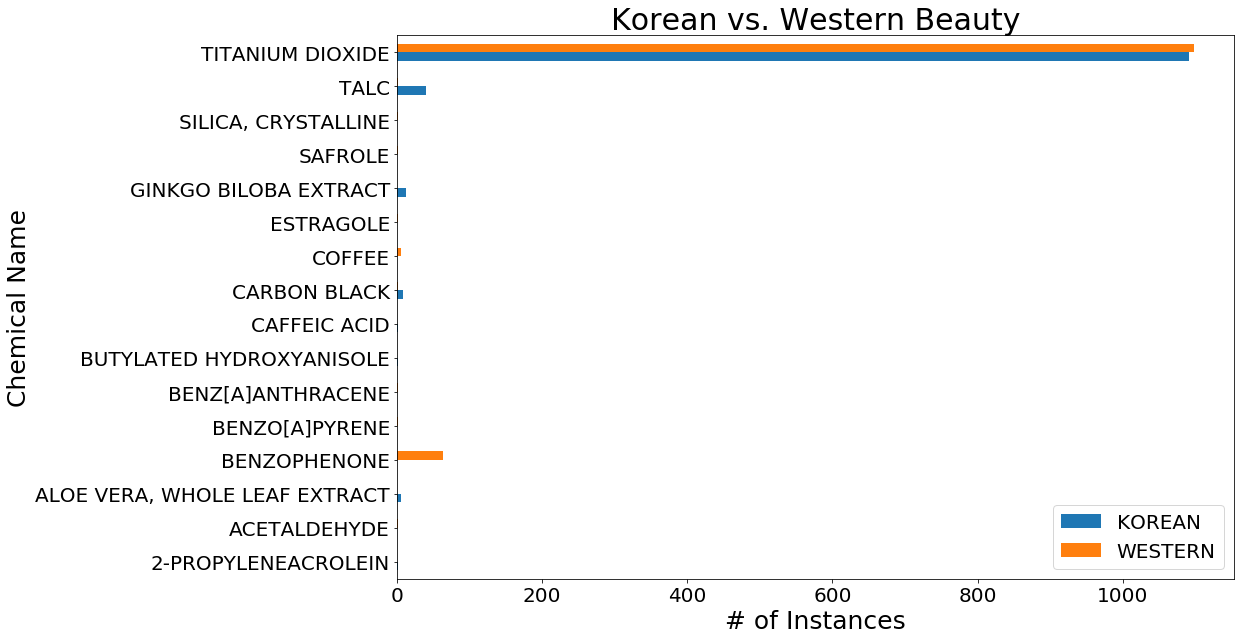

In [17]:
#Plot datapoints
ax = beauty_df_final_count.groupby(['Chemical Name', 'Korean/Western']).sum()['# of Instances'].unstack().plot(kind='barh', stacked=False, figsize=[15,10])
ax.set_xlabel('# of Instances', fontsize=25)
ax.set_ylabel('Chemical Name', fontsize=25)
ax.set_title('Korean vs. Western Beauty', fontsize=30)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower right', fontsize=20)

(0, 100)

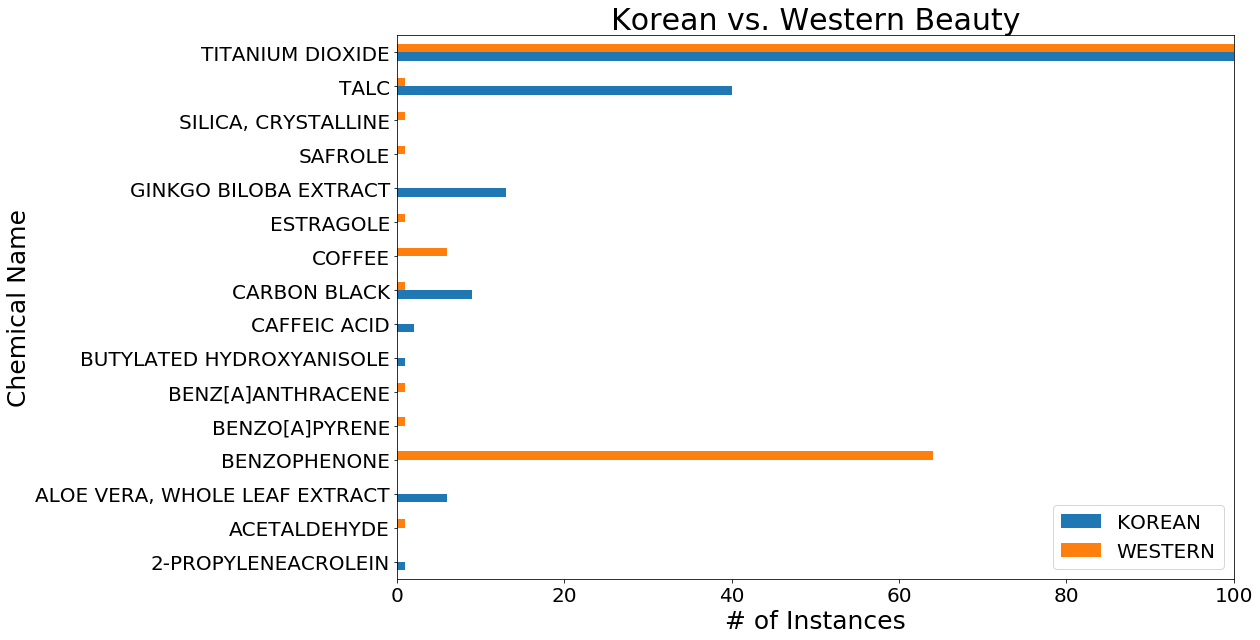

In [15]:
#Plot datapoints
ax = beauty_df_final_count.groupby(['Chemical Name', 'Korean/Western']).sum()['# of Instances'].unstack().plot(kind='barh', stacked=False, figsize=[15,10])
ax.set_xlabel('# of Instances', fontsize=25)
ax.set_ylabel('Chemical Name', fontsize=25)
ax.set_title('Korean vs. Western Beauty', fontsize=30)
ax.tick_params(axis='both', labelsize=20)
ax.legend(loc='lower right', fontsize=20)
ax.set_xlim(0, 100)